# Name: Ayush Shrikhande | PRN: 22070521054 | Dataset: Stock Market Dataset

In [28]:
import pandas as pd

# Load the dataset from the Excel file
df_yahoo = pd.read_excel('/content/yahoo_data[1].xlsx')

# Display the first 5 rows of the DataFrame
print("DataFrame Head:")
print(df_yahoo.head())

# Print a concise summary of the DataFrame
print("\nDataFrame Info:")
df_yahoo.info()

# Generate descriptive statistics of the numerical columns
print("\nDataFrame Description:")
print(df_yahoo.describe())

# Check for missing values in each column
print("\nMissing Values:")
print(df_yahoo.isnull().sum())

DataFrame Head:
           Date      Open      High       Low    Close*  Adj Close**  \
0  Apr 28, 2023  33797.43  34104.56  33728.40  34098.16     34098.16   
1  Apr 27, 2023  33381.66  33859.75  33374.65  33826.16     33826.16   
2  Apr 26, 2023  33596.34  33645.83  33235.85  33301.87     33301.87   
3  Apr 25, 2023  33828.34  33875.49  33525.39  33530.83     33530.83   
4  Apr 24, 2023  33805.04  33891.15  33726.09  33875.40     33875.40   

      Volume  
0  354310000  
1  343240000  
2  321170000  
3  297880000  
4  252020000  

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1258 non-null   object 
 1   Open         1258 non-null   float64
 2   High         1258 non-null   float64
 3   Low          1258 non-null   float64
 4   Close*       1258 non-null   float64
 5   Adj Close**  1258 non-null   float64
 6

In [29]:
import pandas as pd

# Convert 'Date' column to datetime
df_yahoo['Date'] = pd.to_datetime(df_yahoo['Date'])

# Rename 'Close*' and 'Adj Close**' columns
df_yahoo = df_yahoo.rename(columns={'Close*': 'Close', 'Adj Close**': 'Adj Close'})

# Define features (X) and target (y)
X = df_yahoo[['Open', 'High', 'Low', 'Volume']]
y = df_yahoo['Adj Close']

print("DataFrame after preprocessing:")
print(df_yahoo.head())
print("\nFeatures (X) head:")
print(X.head())
print("\nTarget (y) head:")
print(y.head())

DataFrame after preprocessing:
        Date      Open      High       Low     Close  Adj Close     Volume
0 2023-04-28  33797.43  34104.56  33728.40  34098.16   34098.16  354310000
1 2023-04-27  33381.66  33859.75  33374.65  33826.16   33826.16  343240000
2 2023-04-26  33596.34  33645.83  33235.85  33301.87   33301.87  321170000
3 2023-04-25  33828.34  33875.49  33525.39  33530.83   33530.83  297880000
4 2023-04-24  33805.04  33891.15  33726.09  33875.40   33875.40  252020000

Features (X) head:
       Open      High       Low     Volume
0  33797.43  34104.56  33728.40  354310000
1  33381.66  33859.75  33374.65  343240000
2  33596.34  33645.83  33235.85  321170000
3  33828.34  33875.49  33525.39  297880000
4  33805.04  33891.15  33726.09  252020000

Target (y) head:
0    34098.16
1    33826.16
2    33301.87
3    33530.83
4    33875.40
Name: Adj Close, dtype: float64


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print("Model training complete and predictions made.")
print(f"First 5 predictions: {y_pred[:5]}")
print(f"First 5 actual values: {y_test[:5].tolist()}")

Model training complete and predictions made.
First 5 predictions: [31014.97210576 34270.14884859 34023.37563811 34035.80942812
 24500.10220837]
First 5 actual values: [31055.86, 34395.01, 34089.27, 33978.08, 24553.24]


In [31]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"R-squared: {r_squared:.4f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

R-squared: 0.9992
Mean Squared Error (MSE): 13354.94
Root Mean Squared Error (RMSE): 115.56


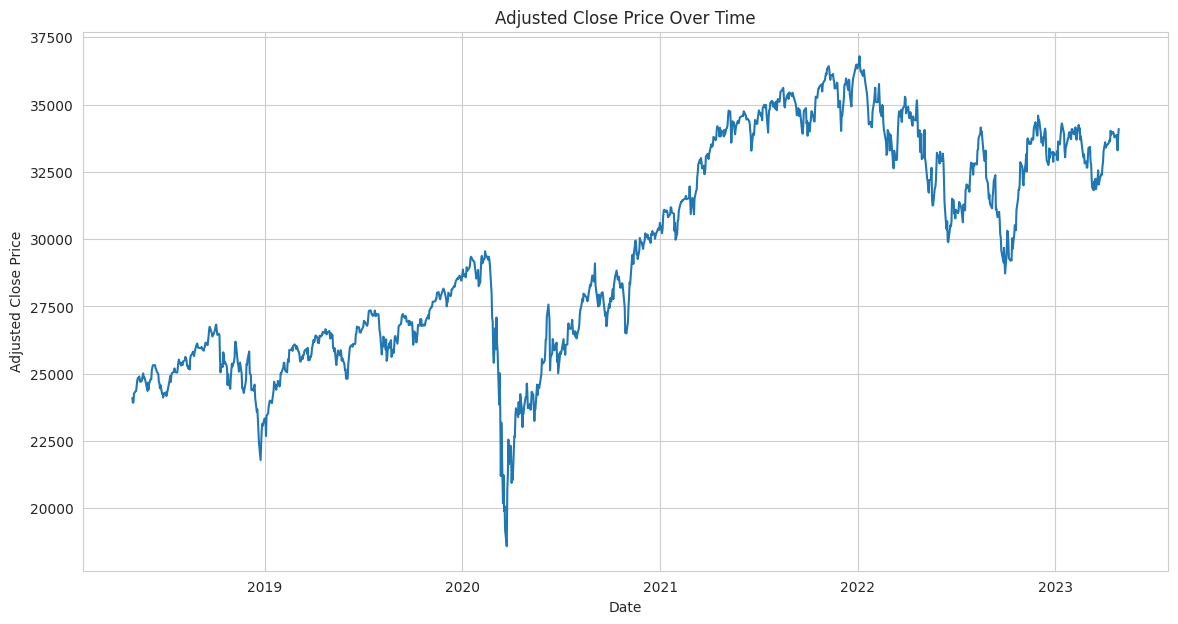

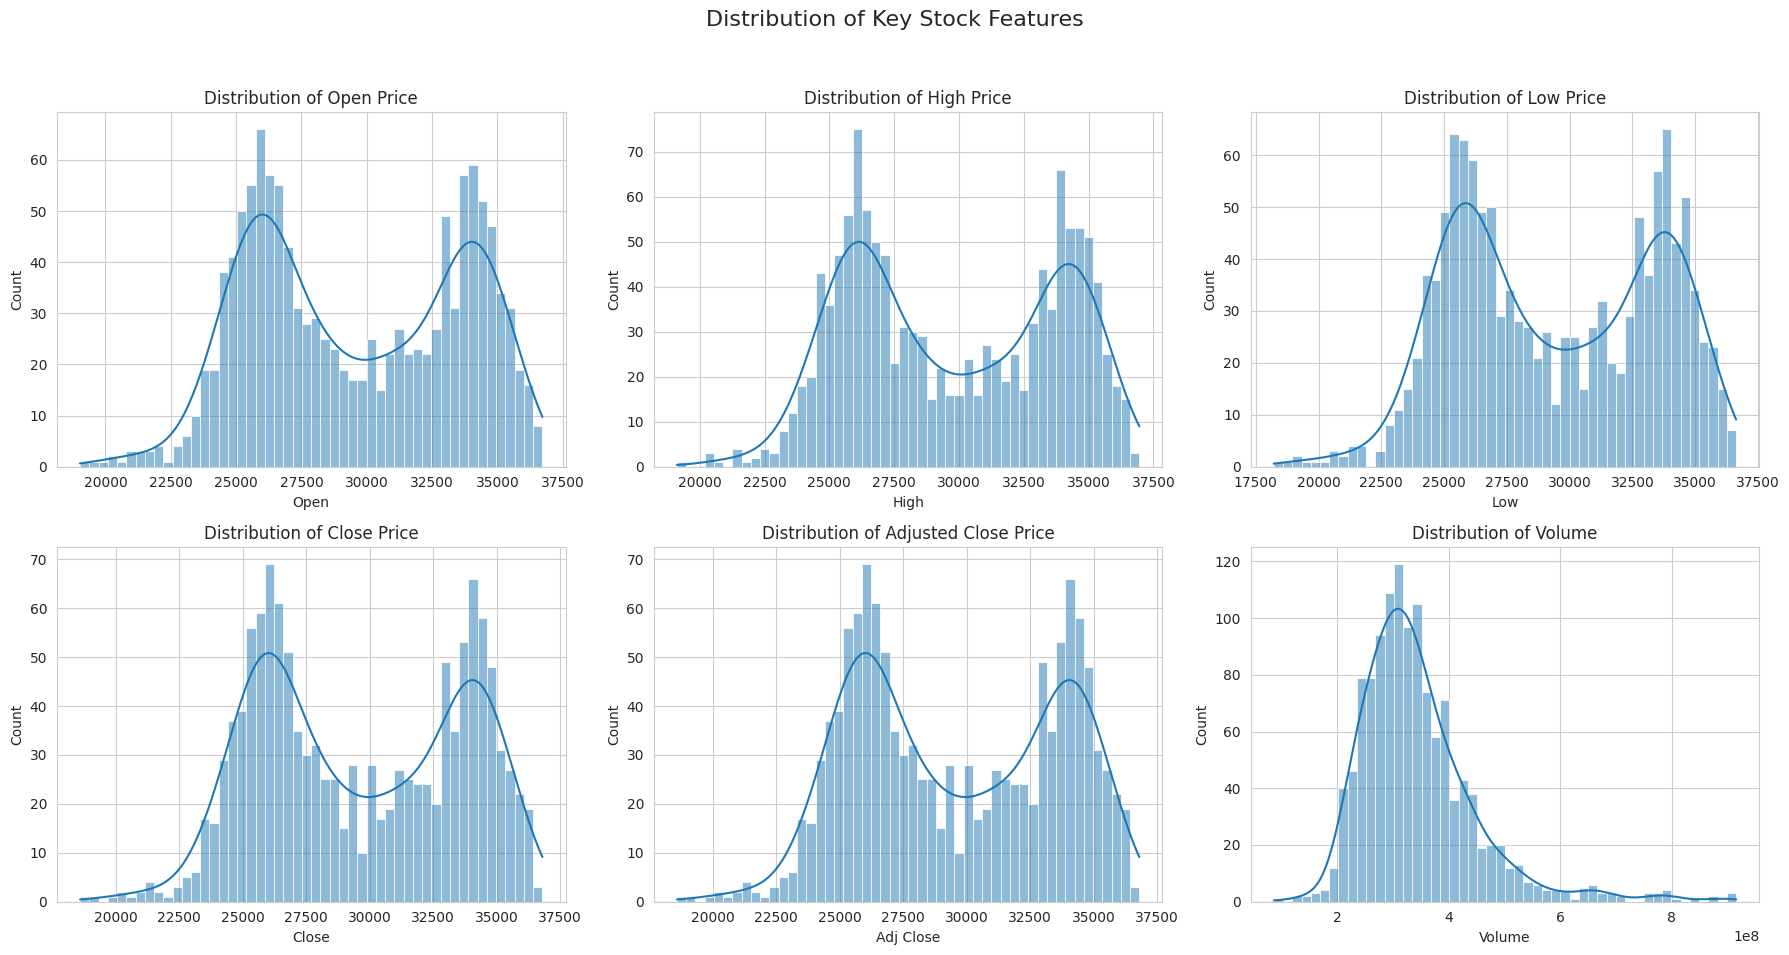

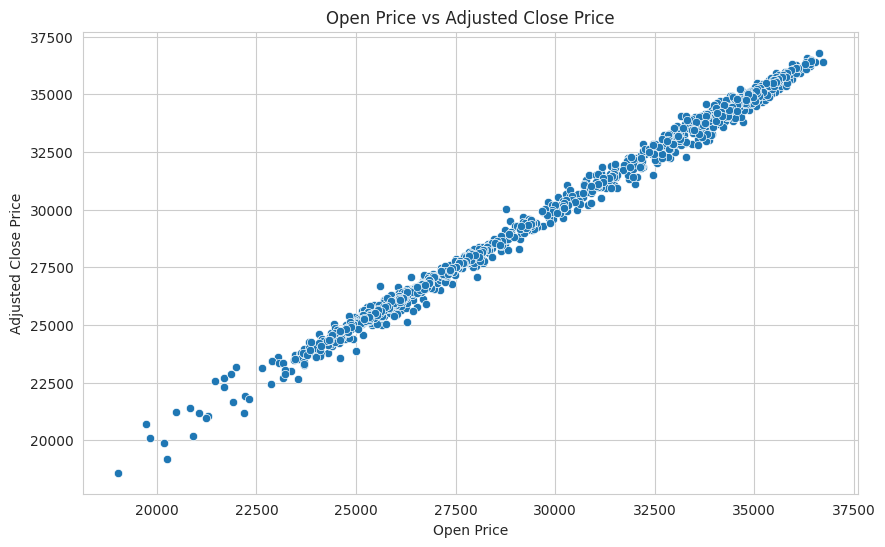

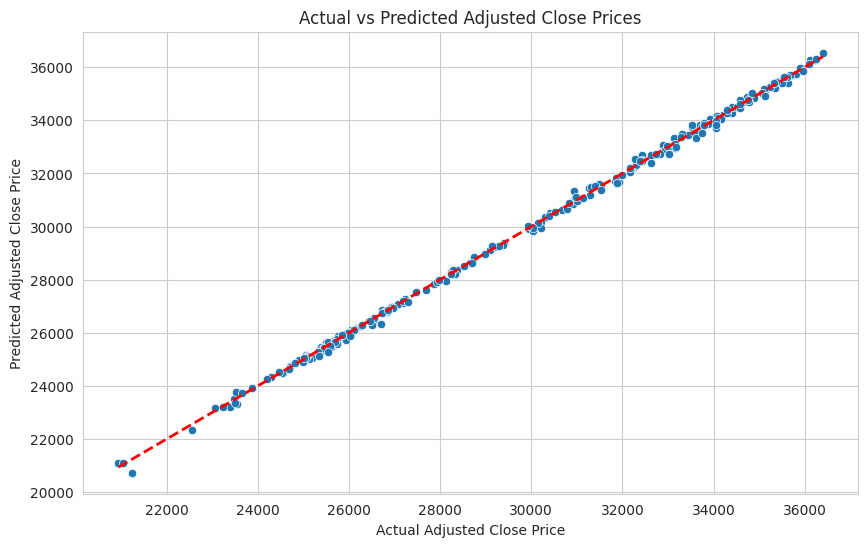

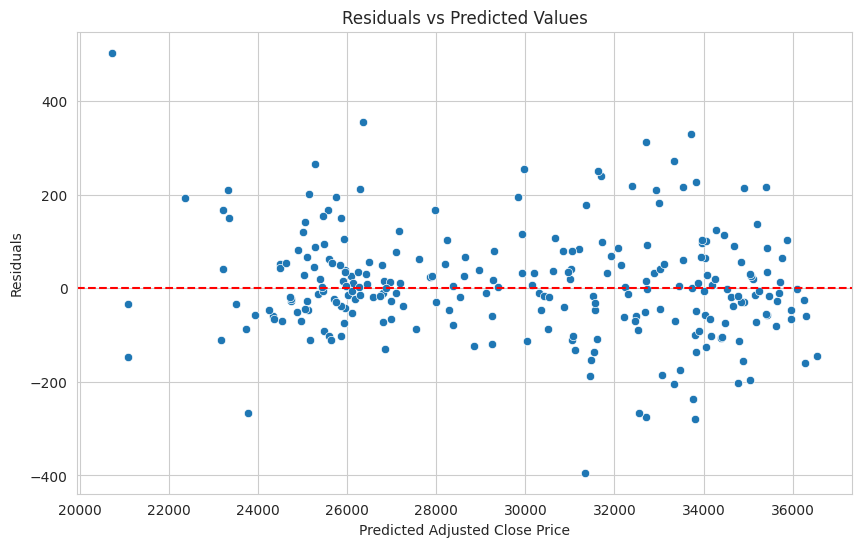

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# 1. Time Series Plot of Adjusted Close Price
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Adj Close', data=df_yahoo)
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

# 2. Histograms of Key Features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Distribution of Key Stock Features', fontsize=16)

sns.histplot(df_yahoo['Open'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Open Price')

sns.histplot(df_yahoo['High'], bins=50, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of High Price')

sns.histplot(df_yahoo['Low'], bins=50, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Low Price')

sns.histplot(df_yahoo['Close'], bins=50, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Close Price')

sns.histplot(df_yahoo['Adj Close'], bins=50, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Adjusted Close Price')

sns.histplot(df_yahoo['Volume'], bins=50, kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Volume')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# 3. Scatter Plot of Open vs Adj Close
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Open', y='Adj Close', data=df_yahoo)
plt.title('Open Price vs Adjusted Close Price')
plt.xlabel('Open Price')
plt.ylabel('Adjusted Close Price')
plt.show()

# 4. Actual vs Predicted Values Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Line for perfect prediction
plt.title('Actual vs Predicted Adjusted Close Prices')
plt.xlabel('Actual Adjusted Close Price')
plt.ylabel('Predicted Adjusted Close Price')
plt.show()

# 5. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Adjusted Close Price')
plt.ylabel('Residuals')
plt.show()

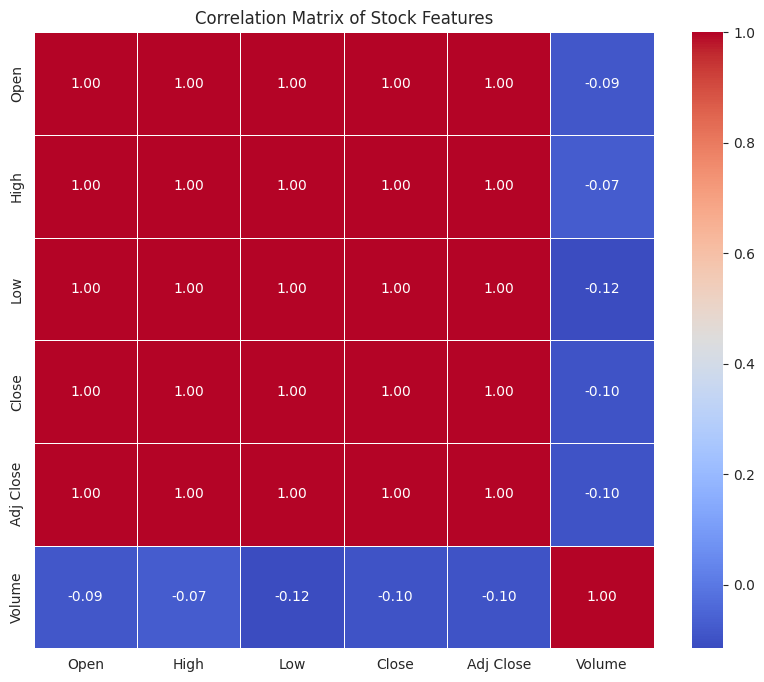

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Select numerical columns for correlation analysis
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
df_numerical = df_yahoo[numerical_cols]

# 2. Calculate the correlation matrix
correlation_matrix = df_numerical.corr()

# 3. Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# 6. Add a title to the heatmap
plt.title('Correlation Matrix of Stock Features')
# 7. Display the plot
plt.show()

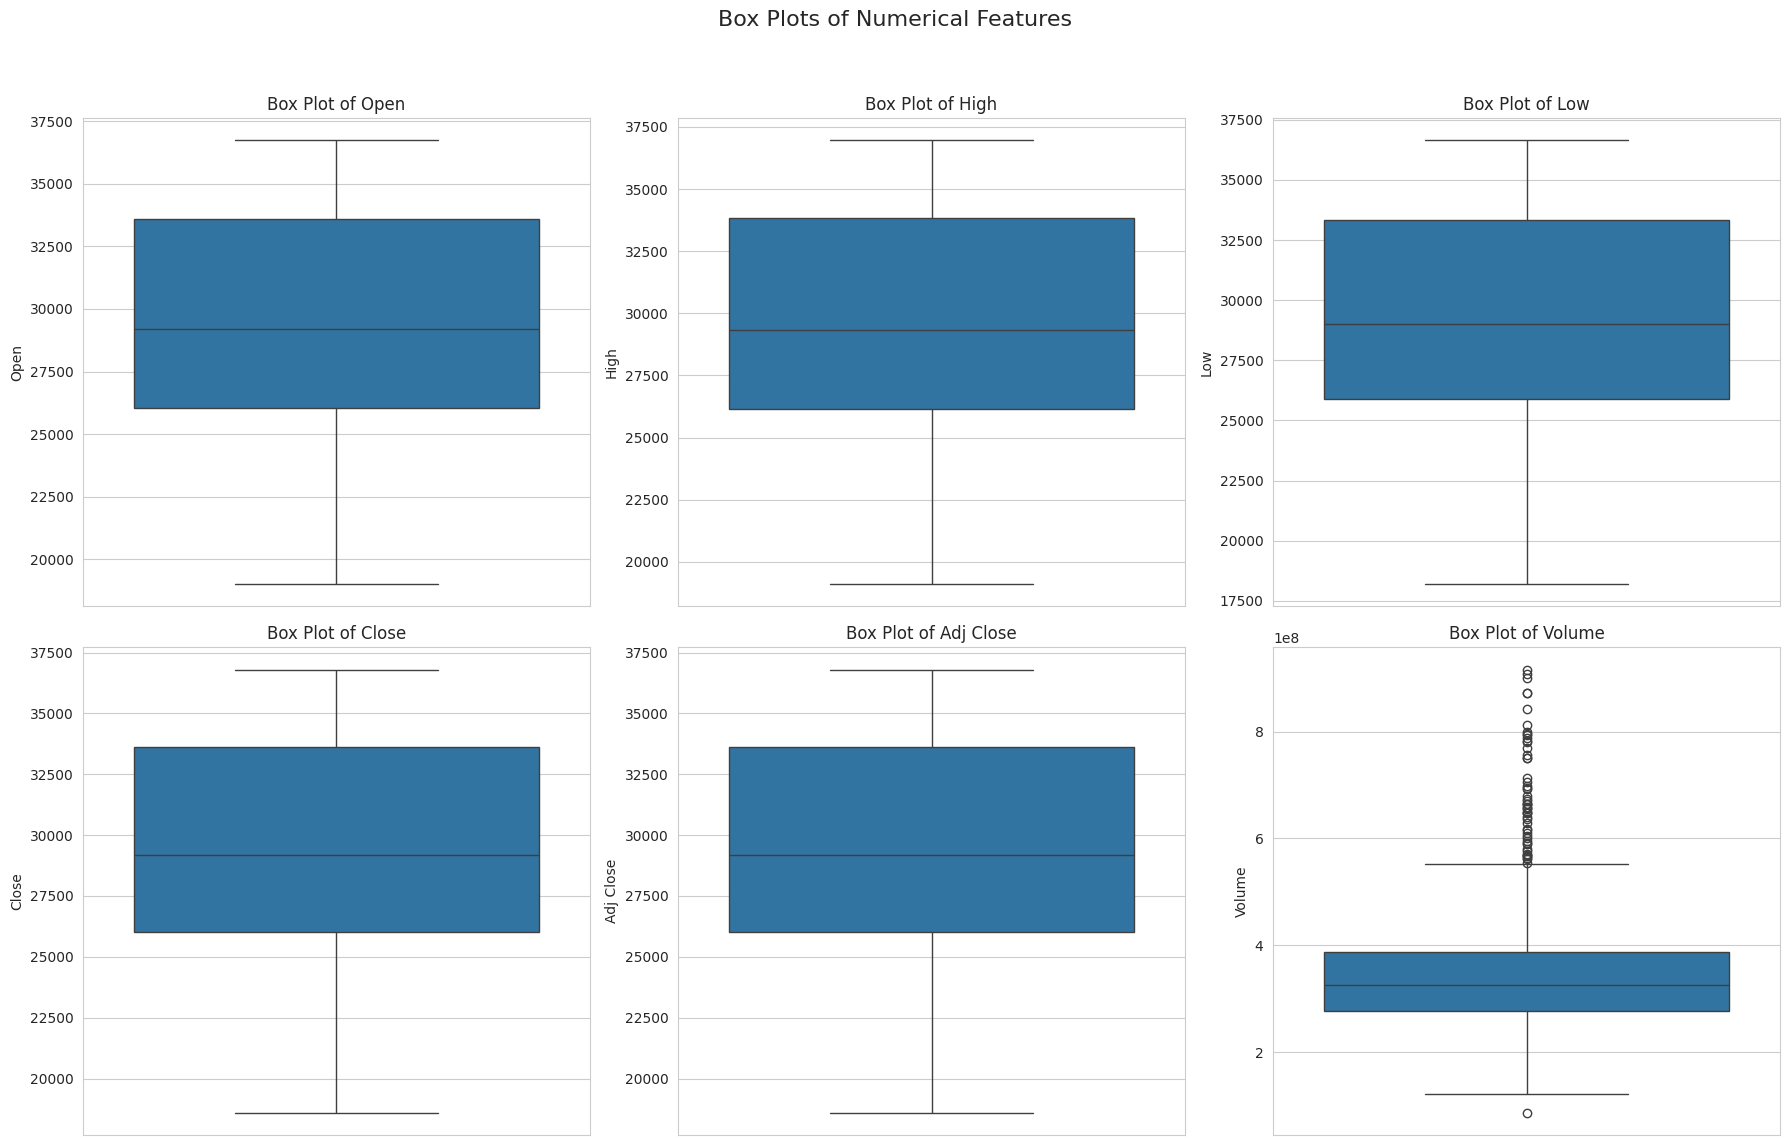

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to plot
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Create a figure and a set of subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Box Plots of Numerical Features', fontsize=16)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate through numerical columns and create a box plot for each
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df_yahoo[col], ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    axes[i].set_ylabel(col)

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()